# Prosjekt: Bølgefysikk og Fluidmekanikk TFY4163
Løsning av differensialligninger: Fjerdeordens Runge-Kutta metoden for enkel harmonisk pendel

Bevegelsesligning for en pendel med friksjon og drivkraft:
$$\frac{d^2 \theta}{dt^2} + \frac{g}{l}\sin{\theta} + q\frac{d\theta}{dt}=\frac{F_D}{ml}\sin(\omega_Dt)$$

Parametere og startverdier:
   - Lengden av snora, $l$= 1.0m
   - Tyngdeakselerasjonen, $g_a$ = 9.81 ms$^{-2}$
   - Initiell vinkel med hensyn til vertikalen, $\theta_0$ = 0.2 rad
   - Initiell vinkelhastighet, $\omega_0$ = 0.0 rad s$^{-1}$
   - Friksjonsparameter, $q$ = 1.0 s$^{-1}$
   - Drivkraftens vinkelfrekvens, $\omega_D$ = 3.13 s$^{-1}$
   - Masse, $m = 5$ kg
   - Drivkraft, $\frac{F_D}{ml} = 0.2$ N. 
For å gjøre koden enklere velger jeg å definere drivkraften slik at $F =\frac{F_D}{ml} = 0.2 $N.


Definerer to funksjoner som følger:

funksjon $f(w)$:
\begin{equation}
    \frac{d\theta}{dt} = \omega
\end{equation}

funksjon $g(\theta)$:
\begin{equation}
    \frac{d^2\theta}{dt^2} = \frac{d\omega}{dt} = \frac{F_D}{ml}\sin(\omega_Dt) - \frac{g}{l}\sin{\theta} - q\omega
\end{equation}

In [60]:
''' Importing libraries '''
import numpy as np
import matplotlib.pyplot as plt

In [61]:
'''Parameters'''
l = 1.0 
g = 9.81 
q = 1
w_D = 3.13
F = 0.2
m = 5
theta_0 = 0.2
w_0 = 0.0
T = 20
dt = 0.01

## Runge-Kutta løsning av differensiallikningene 

In [62]:
''' Solving the two first-order differential equations '''

def k(theta, w, t, q, w_D): #Equation 1
    """
    Returns right-hand-side of eq.
    """
    return F*np.sin(w_D*t) - ((g/l)*np.sin(theta))-(q*w)

def f(theta, w, t): #Equation 2
    """
    Returns right-hand-side of eq.
    """
    return w

def rk4_step(k, f, theta, w, dt, t, q, w_D):
    """
    Calculates one step of the RK4-algorithm.
    
    theta: float
    previous value of theta
           
    w: float
    previous value of w (omega, angular velocity)
    
    dt: float
    timestep
    
    return: two floats 
    """
    k1 = k(theta, w, t, q, w_D)
    f1 = f(theta, w, t)
    k2 = k(theta + (dt/2)*f1, w, t, q, w_D)
    f2 = f(theta, w + (dt/2)*k1, t)
    k3 = k(theta + (dt/2)*f2, w, t, q, w_D)
    f3 = f(theta, w + (dt/2)*k2, t)
    k4 = k(theta + dt*f3, w, t, q, w_D)
    f4 = f(theta, w + dt*k3, t)
    return theta + (dt/6)*(f1 + (2*f2) + (2*f3) + f4), w + (dt/6)*(k1 + (2*k2) + (2*k3) + k4)

def rk4_method(k, f, theta_0, w_0, dt, T, q, w_D):
    """
    Computes theta and w (omega).  
    
    Parameters
    -----------
    k: RHS of equation
    f: RHS of equation
    theta0: initial value of theta
    w0: initail value of omega
    dt: timestep
    
    return theta, w, t
    """
    n = int(float(T)/dt) # number of iterations
    theta = np.zeros(n)
    w = np.zeros(n)
    t = np.linspace(0, T, n)
    theta[0] = theta_0
    w[0] = w_0
    
    for i in range(n-1):
        theta[i+1], w[i+1] = rk4_step(k, f, theta[i], w[i], dt, t[i+1], q, w_D) # Calculates values of theta and omega using RK4-method
    return theta, w, t

In [63]:
def plot_RK4():
    ''' 
    Visualising solution for theta using RK4 method 
    Returns figure
    '''
    theta, w, t = rk4_method(k, f, theta_0, w_0, dt, T, q, w_D) #Calling upon function, retrieving arrays for plot
    
    fig_RK4 = plt.figure('RK4 solution', figsize = (10,6)) 
    plt.plot(t, theta)
    plt.xlabel('Tid [s]', fontsize = 12)
    plt.ylabel('Vinkelutslag [rad]', fontsize = 12)
    plt.title('Vinkelutslag som funksjon av tid ved RK4-algoritmen', fontsize = 16)
    plt.grid()
    return fig_RK4

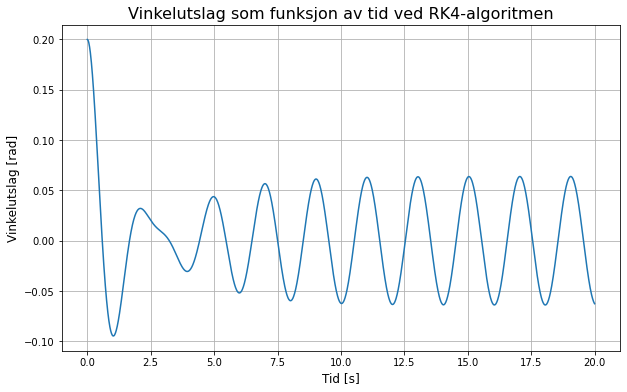

In [64]:
plot_RK4()
plt.show()

## Euler-Cromer løsning av differensiallikningene

In [78]:
def EulerCromer(theta_0, w_0, dt, T):
    '''
    Computes solution for theta and omega as a function of time using Euler Cromer algorithm.
    
    Parameters
    ---------------
    theta_0: intitial angle
    w_0: initial angular velocity
    dt: timestep
    T: total time
    '''
    N = int(T/dt) #Number of iterations
    theta = np.zeros(N) #Array for iteration
    w = np.zeros(N) #Array for iteration
    t = np.linspace(0, T, N) #Array of time
    theta[0] = theta_0 #Initial value
    w[0] = w_0 #Initial value
    
    for i in range(N-1):#Computing solutions
        w[i+1] = w[i] - g/l*theta[i]*dt
        theta[i+1] = theta[i] + w[i+1]*dt
        
    return theta, w, t

## Konvergenstest av fjerde-ordens Runge-Kutta og Euler-Cromer

In [66]:
def k_c(theta, w, t): #Equation 1
    """
    Returns right-hand-side of eq.
    """
    return -(g/l)*(theta)

def f_c(theta, w, t): #Equation 2
    """
    Returns right-hand-side of eq.
    """
    return w

def rk4_step_conv(k_c, f_c, theta, w, dt, t):
    """
    Calculates one step of the RK4-algorithm.
    
    theta: float
    previous value of theta
           
    w: float
    previous value of w (omega, angular velocity)
    
    dt: float
    timestep
    
    return: two floats 
    """
    k1 = k_c(theta, w, t)
    f1 = f_c(theta, w, t)
    k2 = k_c(theta + (dt/2)*f1, w, t)
    f2 = f_c(theta, w + (dt/2)*k1, t)
    k3 = k_c(theta + (dt/2)*f2, w, t)
    f3 = f_c(theta, w + (dt/2)*k2, t)
    k4 = k_c(theta + dt*f3, w, t)
    f4 = f_c(theta, w + dt*k3, t)
    return theta + (dt/6)*(f1 + (2*f2) + (2*f3) + f4), w + (dt/6)*(k1 + (2*k2) + (2*k3) + k4)

def rk4_method_conv(k_c, f_c, theta_0, w_0, dt, T):
    """
    Computes theta and w (omega).  
    
    Parameters
    -----------
    k: RHS of equation
    f: RHS of equation
    theta0: initial value of theta
    w0: initail value of omega
    dt: timestep
    
    return theta, w, t
    """
    n = int(float(T)/dt) # number of iterations
    theta = np.zeros(n)
    w = np.zeros(n)
    t = np.linspace(0, T, n)
    theta[0] = theta_0
    w[0] = w_0
    
    for i in range(n-1):
        theta[i+1], w[i+1] = rk4_step_conv(k_c, f_c, theta[i], w[i], dt, t[i]) # Calculates values of theta and omega using RK4-method
    return theta, w, t

In [67]:
def convergence(theta_0, w_0, dt, T):
    '''
    Performs convergence test on numerical integration methods based on the energy conservation of the physical system.
    Assumes energy conserved.
    
    Parameters
    ---------------
    theta_0: initial angular displacement
    w_0: initial angular velocity
    dt: timestep
    T: total seconds
    
    Returns array of energydiffrences with different timesteps for RK4 and Euler Cromer, and array of timesteps.
    
    '''
    dt_arr = np.arange(0.001, 0.1, 0.001)
    conv_RK4 = np.zeros_like(dt_arr)
    conv_EC = np.zeros_like(dt_arr)
    
    def E_tot(theta, w):
        return (1/2)*m*l**2*w**2 + (1/2)*m*g*l*theta**2
    
    E_start = E_tot(theta_0, w_0)

    for i in range(len(dt_arr)):
        theta_RK4, w_RK4, t = rk4_method_conv(k_c, f_c, theta_0, w_0, dt_arr[i], T)
        theta_EC, w_EC, t = EulerCromer(theta_0, w_0, dt_arr[i], T)
        
        conv_RK4[i] = abs(E_tot(theta_RK4[-1], w_RK4[-1]) - E_start)
        conv_EC[i] = abs(E_tot(theta_EC[-1], w_EC[-1]) - E_start)
    
    return conv_RK4, conv_EC, dt_arr

In [68]:
def plot_converge():
    '''
    Computes plot of performed convergencetest on numerical integration methods. 
    Returns figures for RK4-method and EulerCromer-method.
    '''
    conv_RK4, conv_EC, dt_arr = convergence(theta_0, w_0, dt, 20) #Performs convergencetest
    
    RK4_fig = plt.figure('RK4 konvergenstest', figsize = (8,6)) #Plot RK4
    plt.plot(dt_arr, conv_RK4, label = 'Energidifferanse ved Runge-Kutta')
    plt.xlabel('Tidssteg [s]', fontsize = 12)
    plt.ylabel('Forskjell i energi [J]', fontsize = 12)
    plt.title('Konvergenstest av energien ved fjerdeordens Runge-Kutta metode', fontsize = 16)
    plt.legend()
    # plt.show()
    
    EC_fig = plt.figure('EC konvergenstest', figsize = (8,6)) #Plot EulerCromer
    plt.plot(dt_arr, conv_EC, label = 'Energidifferanse ved Euler-Cromer')
    plt.xlabel('Tidssteg [s]', fontsize = 12)
    plt.ylabel('Forskjell i energi [J]', fontsize = 12)
    plt.title('Konvergenstest av energien ved Euler-Cromers metode', fontsize = 16)
    plt.legend()
    # plt.show()
    
    return RK4_fig, EC_fig

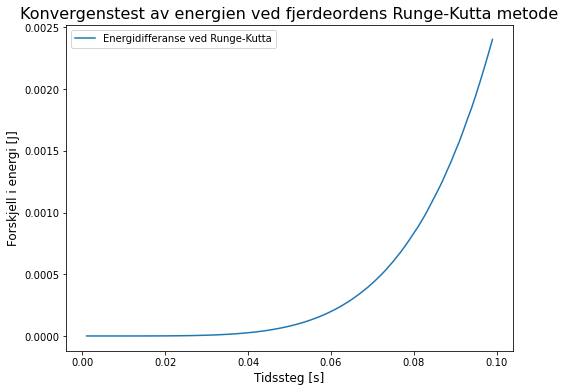

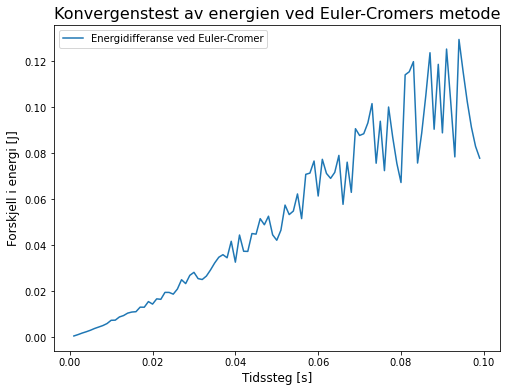

In [69]:
plot_converge() #Visualising convergencetests of RK4 and EulerCromer
plt.show()

## DEL 3: Resonantamplituder ved ulike drivfrekvenser, w_D

In [70]:
def plot_F_RK4(w_a):
    '''
    Computes the angular displacements and amplitudes of varying drivingfrequencies.
    
    w_a: Array (or value) of drivingfrequencies, w_D. Used in calculation of Equation 1.
    '''
    for i in range(len(w_a)): #Iterating through values of w_D
        theta, w, t = rk4_method(k, f, theta_0, w_0, dt, T, q, w_a[i]) #Calling upon RK4
    
        fig_RK4_driv = plt.figure('Varying driving frequencies', figsize = (10,6)) 
        plt.plot(t, theta, label = f'Omega_D = {w_a[i]}')
        plt.xlabel('Tid [s]', fontsize = 12)
        plt.ylabel('Vinkelutslag [rad]', fontsize = 12)
        plt.title('Resonantamplituder ved varierende w_D', fontsize = 16)
        plt.grid()
        plt.legend()
    return fig_RK4_driv

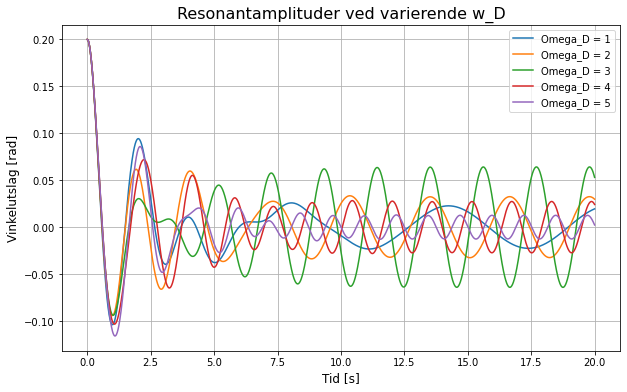

In [71]:
w_arr = np.arange(1, 6) #Array of driving frequencies values 1 to 5
plot_F_RK4(w_arr) #Plotting amplitudes
plt.show()

## DEL 4: Resonantamplituder ved ulike friksjonsparametere, q

In [72]:
def plot_q_RK4(q_a): 
    '''
    Computes plot of angular displacement with varying friction parameters, q. 
    
    q_a: Array (or value) containing friction parameters.
    '''
    for i in range(len(q_a)): #Iterating over friction values
        theta, w, t = rk4_method(k, f, theta_0, w_0, dt, T, q_a[i], w_D) #Calling upon RK4
    
        fig_RK4_frik = plt.figure('Varying friction', figsize = (10,6)) 
        plt.plot(t, theta, label = f' q = {np.round(q_a[i], decimals = 2)}')   
        plt.xlabel('Tid [s]', fontsize = 12)
        plt.ylabel('Vinkelutslag [rad]', fontsize = 12)
        plt.title('Resonantamplituder ved ulik friksjonsparameter', fontsize = 16)
        plt.grid()
        plt.legend()
    plt.show()
    return fig_RK4_frik

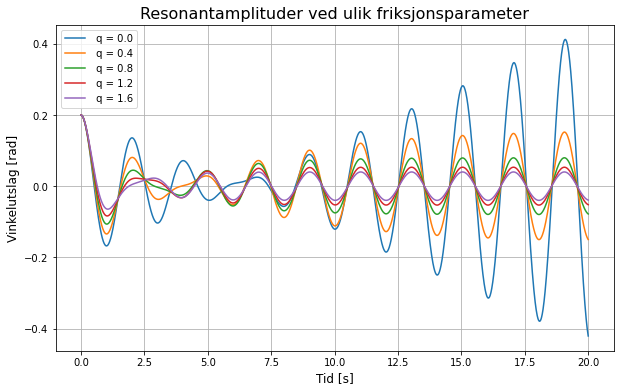

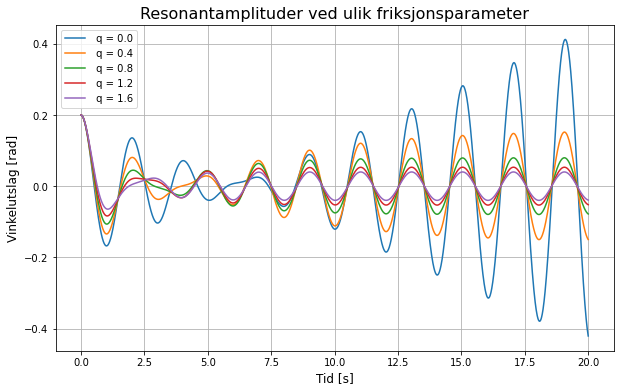

In [73]:
q_arr = np.arange(0, 2, 0.4)
plot_q_RK4(q_arr) #Visualising plot

## DEL 5: Plotte forskjellig dempede svingninger

In [74]:
def plot_b_RK4(b_arr):
    '''
    Computes plot of critical, under- and overdamped oscillations.
    
    b_arr: Array of the q-values that correspond to the different damped systems.
    '''
    T=4 #Plotting upto t=4 seconds
    for i in range(len(b_arr)): #Iterating over q-values
        theta, w, t = rk4_method(k, f, theta_0, w_0, dt, T, b_arr[i], w_D) #Calling upon RK4

        fig_RK4_dempet = plt.figure('Damped system', figsize = (10,6)) 
        if i == 0:
            plt.plot(t, theta, label = f' Underkritisk')
        if i == 1:
            plt.plot(t, theta, label = f' Kritisk')
        if i == 2:
            plt.plot(t, theta, label = f' Overkritisk')
        plt.xlabel('Tid [s]', fontsize = 12)
        plt.ylabel('Vinkelutslag [rad]', fontsize = 12)
        plt.title('Dempede oscillasjoner, varieriende q', fontsize = 16)
        plt.grid()
        plt.legend()
    plt.show()
    return fig_RK4_dempet

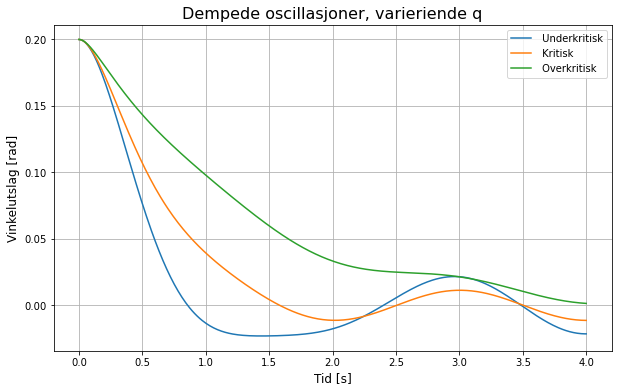

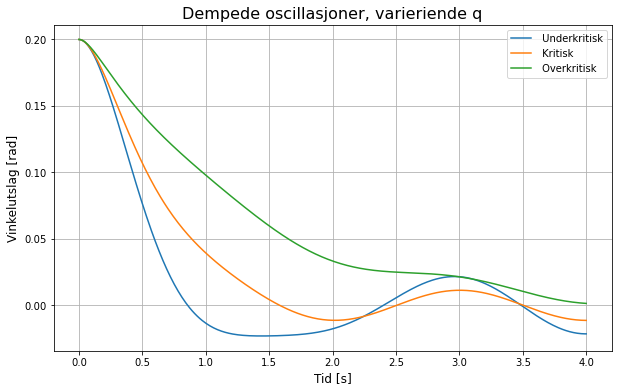

In [75]:
q_damped = np.array([3, 5.6, 12])
plot_b_RK4(q_damped) #Visualising plot